# ***Netflix Movie Data Analysis***

In [1]:
# Importing Lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data_set

df = pd.read_csv('Netflix_2024_Dataset.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
        9827 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [4]:
# Changing datatype of column A

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


C:\Users\Series\AppData\Local\Temp\ipykernel_8536\1272227401.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [5]:
# Checking for Duplicated Rows

df.duplicated().sum()

0

In [6]:
# Exploring Summary Statistics

df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9826.000000,9826.000000,9826.000000
mean,2006-09-23 11:05:51.317798144,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.128250,146.000000,5.900000
50%,2011-09-13 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797


In [7]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [8]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

# *Dropping lists from data set*

In [9]:
# Making list of column to be dropped

cols = ['Overview', 'Original_Language', 'Poster_Url\r']

In [10]:
# dropping columns and confirming changes

df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [11]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


# *Categorizing Vote Average column*

*We would cut the Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function provided above.*

In [12]:
 """Categorises a certain column based on its quartiles

 Args:
 (df) df - dataframe we are proccesing
 (col) str - to be catigorized column's name
 (labels) list - list of labels from min to max

 Returns:
 (df) df - dataframe with the categorized col"""

 # Setting the edges to cut the column accordingly

def catergorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [13]:
# Define labels for edges

labels = ['Flop', 'Below_Avg', 'Average', 'Hit']

# Categorize column based on labels and edges

catergorize_col(df, 'Vote_Average', labels)

# Confirming changes

df['Vote_Average'].unique()

['Hit', 'Below_Avg', 'Average', 'Flop', NaN]
Categories (4, object): ['Flop' < 'Below_Avg' < 'Average' < 'Hit']

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,Hit,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076.0,Hit,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,Average,"Action, Adventure, Thriller, War"


In [15]:
# Exploring column

df['Vote_Average'].value_counts()

Vote_Average
Flop         2467
Hit          2450
Average      2411
Below_Avg    2398
Name: count, dtype: int64

In [16]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        1
Vote_Count        1
Vote_Average    101
Genre             1
dtype: int64

In [17]:
# Dropping NaNs

df.dropna(inplace = True)

# Confirming

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,Hit,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076.0,Hit,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,Average,"Action, Adventure, Thriller, War"


# *Split*

*I have split genres into a list and then exploded our dataframe to have only one genre per row for each movie.*

In [19]:
# Split the Strings into lists

df['Genre'] = df['Genre'].str.split(', ')

# Explode the lists


df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Science Fiction
3,2022,The Batman,3827.658,1151.0,Hit,Crime
4,2022,The Batman,3827.658,1151.0,Hit,Mystery


In [20]:
# Casting column into Category

df['Genre'] = df['Genre'].astype('category')

# Confirming

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


In [22]:
df['Title'].unique().sum()

'Spider-Man: No Way HomeThe BatmanNo ExitEncantoThe King\'s ManThe CommandoScreamKimiFistful of VengeanceEternalsPursuitMy Hero Academia: World Heroes\' MissionRestlessNightmare AlleyThe Ice Age Adventures of Buck WildHotel Transylvania: TransformaniaTexas Chainsaw MassacreThe RequinLooop LapetaRed NoticeSing 2The Jack in the Box: AwakeningVenom: Let There Be CarnageThe Matrix ResurrectionsResident Evil: Welcome to Raccoon CityLast Man DownAmerican SiegeUnchartedDemon Slayer -Kimetsu no Yaiba- The Movie: Mugen TrainGhostbusters: AfterlifeThe 355Shang-Chi and the Legend of the Ten RingsMarry MeThe HuntingWest Side StoryThrough My WindowThe Seven Deadly Sins: Cursed by LightOne ShotTom and Jerry: Cowboy Up!Chernobyl: AbyssDesperate RidersClifford the Big Red DogTyler Perry\'s A Madea HomecomingThe Boss Baby: Family BusinessTurning RedBrazenThe HouseBlacklightRon\'s Gone WrongFree GuyCruellaThe Suicide SquadThe Simpsons in PlusaversaryForgive Us Our TrespassesLucaMortal KombatZack Snyder\

In [23]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# **Data Visualization**

*In here, I have used Matplotlib and Seaborn for making some informative visuals to gain insights abut our data*

In [24]:
# Setting up Seaborn Configurations

sns.set_style('whitegrid')

In [25]:
# Showing stats on Genre column

df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

**Q1: What is the most frequent genre in the dataset?**

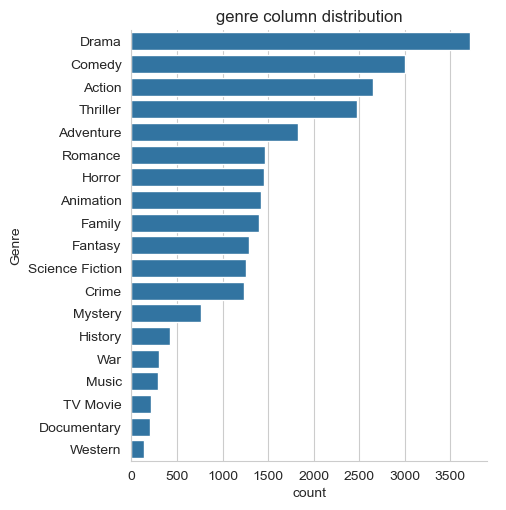

In [26]:
# Visualizing Genre column

sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index)
plt.title('genre column distribution')
plt.show()

*We can notice from the above visual that the Drama Genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.*

**Q2: What Genres have the highest votes?**

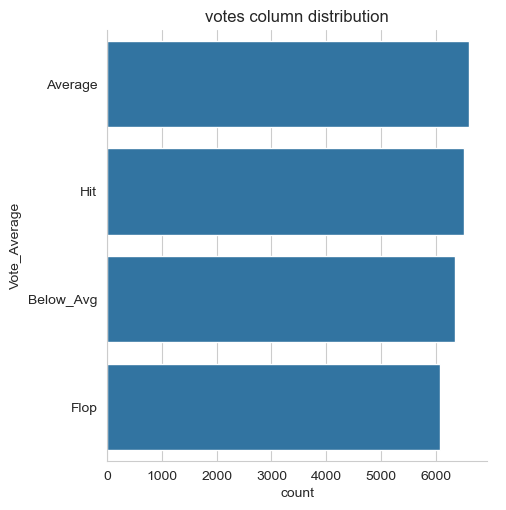

In [27]:
# Visualizing vote_average column

sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index)
plt.title('votes column distribution')
plt.show()

**Q3: What movie got the highest popularity? What's its Genre?**

In [28]:
# Checking Max Popularity in dataset

df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,Hit,Science Fiction


**Q4: What movie got the lowest popularity? What's its Genre?**

In [29]:
# Checking Min Popularity in dataset

df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,Average,History
25548,1984,Threads,13.354,186.0,Hit,War
25549,1984,Threads,13.354,186.0,Hit,Drama
25550,1984,Threads,13.354,186.0,Hit,Science Fiction


**Q5: Which year has the most filmmed movies?**

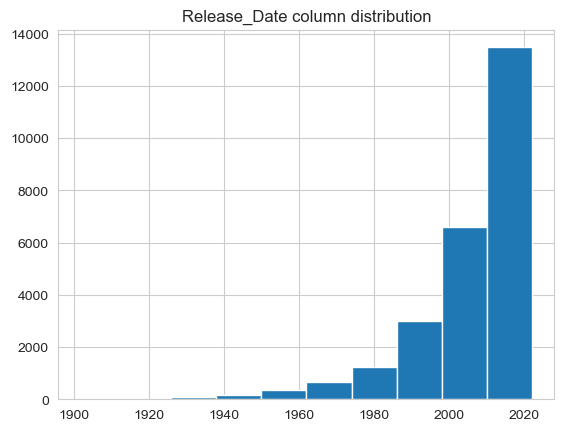

In [30]:
# Checking movie Release dates in dataset

df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

# **Conclusion**

***Q1: What is the most frequent genre in the dataset?***

***The drama genre is the most frequent in our dataset and has appeared more than 14% of the times among 19 other Genres.***

***Q2: What genres have the highest votes?***

***We have 25.5% of our dataset with the popular vote (6520 rows). Drama again has the highest popularity among fans, having more than 18.5% movie popularity.***

***Q3: What movie got the highest popularity? What's its genre?***

***Spider-Man: No Way Home has the highest popularity rate in our dataset, and it has the genres of Action, Adventure and Science-fiction.***

***Q4: What movie got the lowest popularity? What's its genre?***

***The United States thread has the highest lowest rate in our dataset, and it has genres of music, drama, war, sci-fi and history.***

***Q5: Which year has the most filmed movies?***

***The year 2020 has the highest filmming rate in our dataset.***